# Predicting Melbourne House Prices

David Watts s3367060

# Table of contents
1. [Introduction](#introduction)
2. [Overview](#overview)
3. [Data Preperation](#data)
4. [Statistical Modeling and Performance Evaluation](#model)
5. [Summary and Conclusions](#summary)

## Introduction <a name="introduction"></a>

The goal of this project is to predict Melbourne, Australia house prices based on 3 variables; distance from CBD, lot size and number of bedrooms. The dataset was sourced from Tony Pino via Kaggle, and contains Melbourne housing clearance data (Pino, 2018). 

## Overview <a name="overview"></a>

### Data Source

The dataset was sourced from Tony Pino via Kaggle, and contains Melbourne housing clearance data (Pino, 2018). 

While the dataset originally was Jan 2016, it is now up to version 27 with 34,856 observations, with sale dates ranging from 3/09/2016 - 24/02/2018. 

The data was spot checked, for example at index 34854 for the observation 147A Severn Street Yarraville Vic 3013, the price, bedrooms is accurate according to this listing: https://www.realestate.com.au/sold/property-townhouse-vic-yarraville-127437186, and the distance to the CBD is accurate when checking tools such as measure distance on Google Maps.

During this time, RBA interest rates were approxiamtely 1.5%-1.75%. 

### Project Objective

The objective is to see if its possible to predict Melbourne house prices during 2016-2018 based on distance to CBD, lot size, and bedrooms. 


### Target Feature 

The target feature is **price**, which is a continuous numerical feature. As such, our project will utilise multiple linear regression. 

### Descriptive Features

The variable descrpitions below are from the 'Melbourne_housing_FULL.csv'

- **distance**: continous. The distance in KM to the CBD of Melbourne.
- **rooms**: discerete variable. The number of rooms (between 1 and 16 in this dataset)
- **landsize**: continous

The data set has many more features, such as dwelling types (townhouses vs houses), that will not be utilised as part of this project. There are also fields such as Postcode and Address, which will not be utilised as distance to CBD is already provided.



## Data Preparation <a name="data"></a>
### Preliminaries

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
pd.set_option('display.max_columns', None) 

In [2]:
# Read in data
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.sample(10, random_state=999)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22500,Hoppers Crossing,5 Davie Cr,3,h,550000.0,SP,Triwest,23/09/2017,18.4,3029.0,3.0,1.0,2.0,635.0,NaN,1980.0,Wyndham City Council,-37.86866,144.69356,Western Metropolitan,13830.0
26947,Dandenong,5A Godfrey Cr,4,t,NaN,PI,Biggin,11/11/2017,24.7,3175.0,4.0,3.0,1.0,NaN,183.0,2015.0,Greater Dandenong City Council,-37.97390,145.21410,South-Eastern Metropolitan,10894.0
31471,Balwyn North,12 Ventnor St,3,h,NaN,SP,Fletchers,3/03/2018,9.7,3104.0,3.0,1.0,1.0,624.0,NaN,NaN,Boroondara City Council,-37.78262,145.09411,Southern Metropolitan,7809.0
24807,Wollert,39 Birchmore Rd,4,h,335000.0,PI,hockingstuart,14/10/2017,25.5,3750.0,NaN,NaN,NaN,446.0,NaN,NaN,Whittlesea City Council,-37.61939,145.03831,Northern Metropolitan,2940.0
8123,Preston,13 Garnet St,2,h,NaN,SN,Barry,4/06/2016,8.8,3072.0,2.0,1.0,1.0,214.0,85.0,1910.0,Darebin City Council,-37.74620,145.00440,Northern Metropolitan,14577.0
30313,Elwood,14/17 Tiuna Gr,2,u,NaN,PI,Purplebricks,9/12/2017,7.2,3184.0,NaN,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,8989.0
24061,St Kilda,1/3 Robertson Av,2,u,622000.0,S,McGrath,7/10/2017,5.0,3182.0,NaN,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,13240.0
27678,Craigieburn,44 Kensley Cct,4,h,580000.0,SP,LJ,18/11/2017,20.6,3064.0,4.0,2.0,2.0,400.0,NaN,2015.0,Hume City Council,-37.56980,144.91870,Northern Metropolitan,15510.0
30504,Keilor East,27 Park Dr,3,h,850000.0,S,Nelson,9/12/2017,11.7,3033.0,3.0,2.0,2.0,555.0,185.0,1985.0,Brimbank City Council,-37.74886,144.85829,Western Metropolitan,5629.0
14699,Wyndham Vale,5 Dakara Ct,3,h,480000.0,S,hockingstuart,1/07/2017,27.2,3024.0,3.0,1.0,2.0,743.0,110.0,1990.0,Wyndham City Council,-37.89757,144.63041,Western Metropolitan,5262.0


## Data Cleaning and Transformation


In [3]:
print(f"The shape of the dataset is {df.shape} \n")

The shape of the dataset is (34857, 21) 



In [4]:
print(f"Data type are below \n{df.dtypes} \n")

Data type are below 
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object 



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Cleaning Data, Removing Features

As discussed earlier, it is hypothesized that a number of features don't have predictive power for the project goal, so are removed.

To begin with, we are removing any Types that are not "h" for home (this includes "t" and "u" which are Townhosues and Units.



In [6]:
df = df[df.Type == 'h']

Next, we will remove those features.

In [7]:
data = df.drop(columns=['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'])

## Check for Missing Values

In [8]:
print(f"Number of missing values for each feature:")
print(data.isnull().sum())

Number of missing values for each feature:
Rooms          0
Type           0
Price       5508
Distance       1
Landsize    6286
dtype: int64


Any rows with null values will be removed.

In [9]:
data = data.dropna(how='any',axis=0)

## Summary Statistics

##### Table 1: Summary of features

In [10]:
data.describe(include='int64')

,Rooms
count,13625.000000
mean,3.309945
std,0.841005
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,12.000000


In [11]:
data.describe(include='float64')

,Price,Distance,Landsize
count,1.362500e+04,13625.000000,13625.000000
mean,1.220476e+06,11.977930,648.716257
std,6.788804e+05,6.965249,4232.838194
min,1.310000e+05,1.200000,0.000000
25%,7.630000e+05,7.300000,363.000000
50%,1.045000e+06,11.100000,575.000000
75%,1.475000e+06,14.700000,686.000000
max,1.120000e+07,48.100000,433014.000000


## Data Exploration

### Univaraite Visualisation

A histogram and histogram for Rooms.

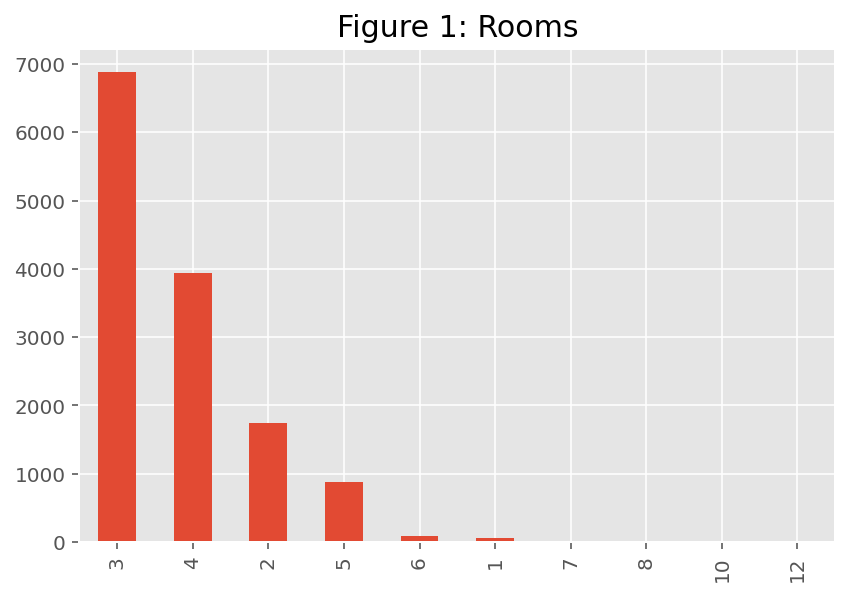

In [12]:
ax = data['Rooms'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Rooms', fontsize = 15)
plt.show();

A boxplot and histogram for price, distance and landsize.

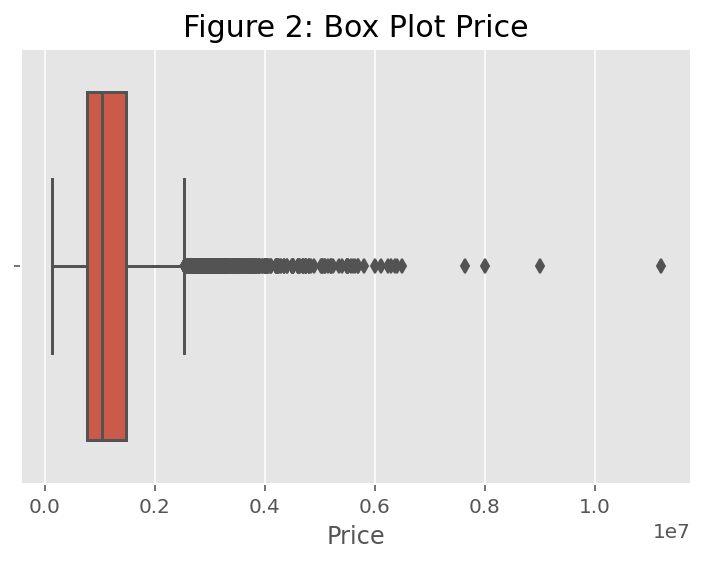

In [13]:
sns.boxplot(data['Price']).set_title('Figure 2: Box Plot Price', fontsize = 15)
plt.show();

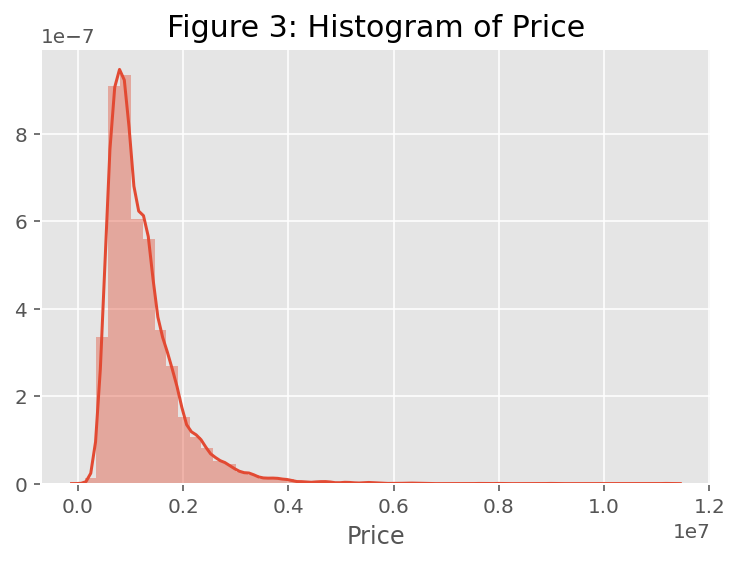

In [14]:
sns.distplot(data['Price'], kde = True).set_title('Figure 3: Histogram of Price', fontsize = 15)
plt.show();

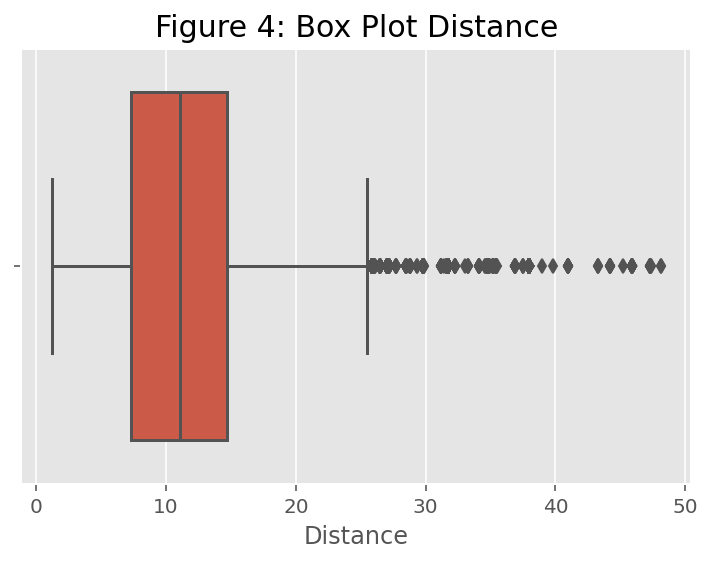

In [15]:
sns.boxplot(data['Distance']).set_title('Figure 4: Box Plot Distance', fontsize = 15)
plt.show();

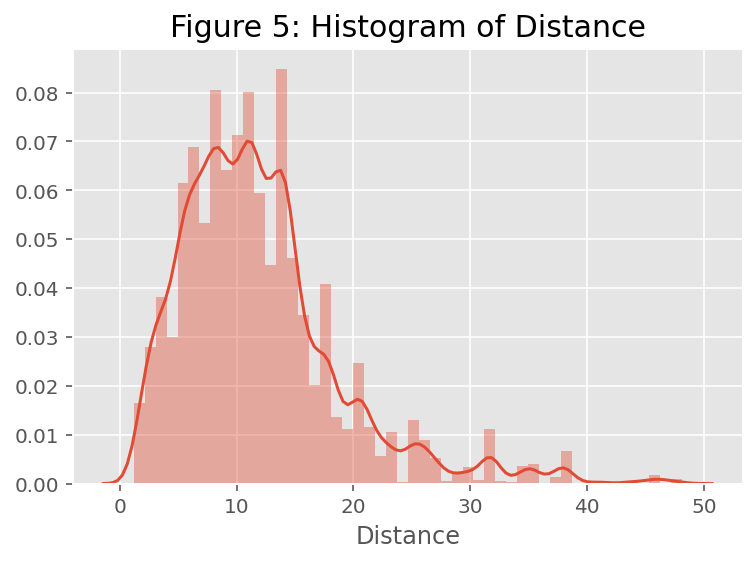

In [16]:
sns.distplot(data['Distance'], kde = True).set_title('Figure 5: Histogram of Distance', fontsize = 15)
plt.show();

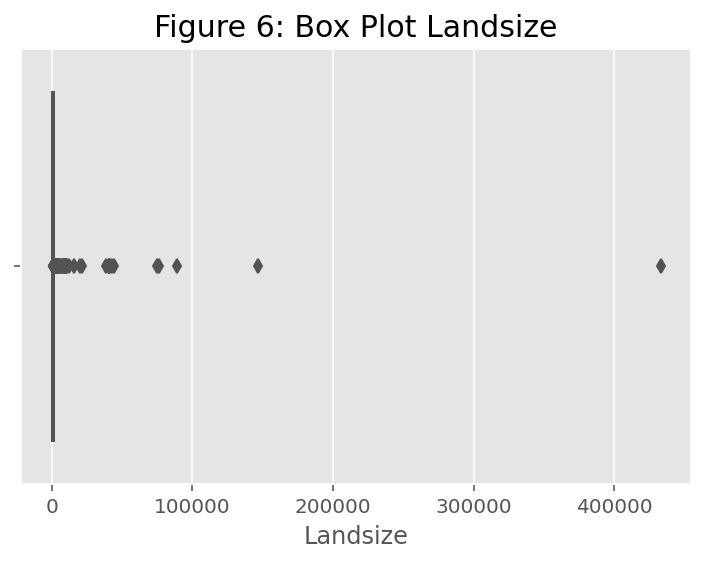

In [17]:
sns.boxplot(data['Landsize']).set_title('Figure 6: Box Plot Landsize', fontsize = 15)
plt.show();

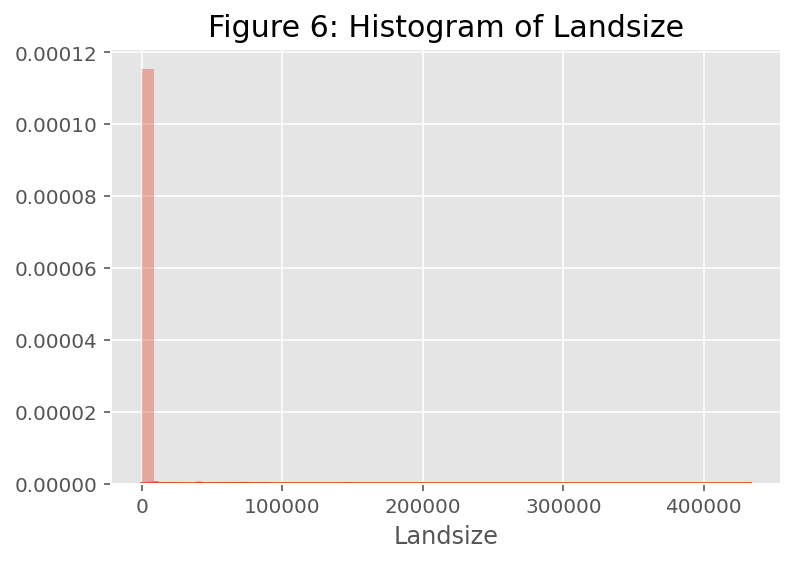

In [18]:
sns.distplot(data['Landsize'], kde = True).set_title('Figure 6: Histogram of Landsize', fontsize = 15)
plt.show();

All of the features are right skewed.

It is noted that Figure 6: Histogram of Landsize has returned a number of outlier results, up to 42,000 sqm. 

### Multivariate Visualisation 

#### Scatterplot of numeric features and price

Figure 7 notes a correlation between the price and the distance to CBD.


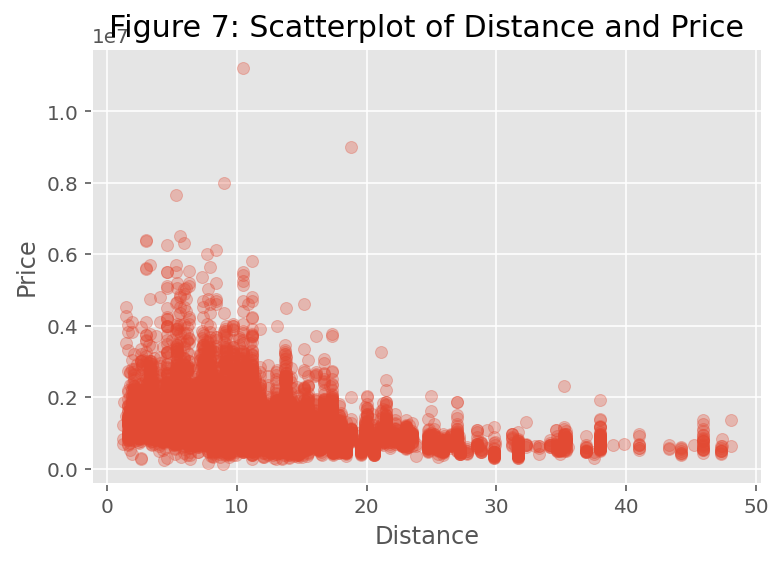

In [19]:
# store the values of Distance
rooms = data['Distance']

# get a scatter plot
plt.scatter(rooms, data['Price'], alpha = 0.3)
plt.title('Figure 7: Scatterplot of Distance and Price', fontsize = 15)
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show();

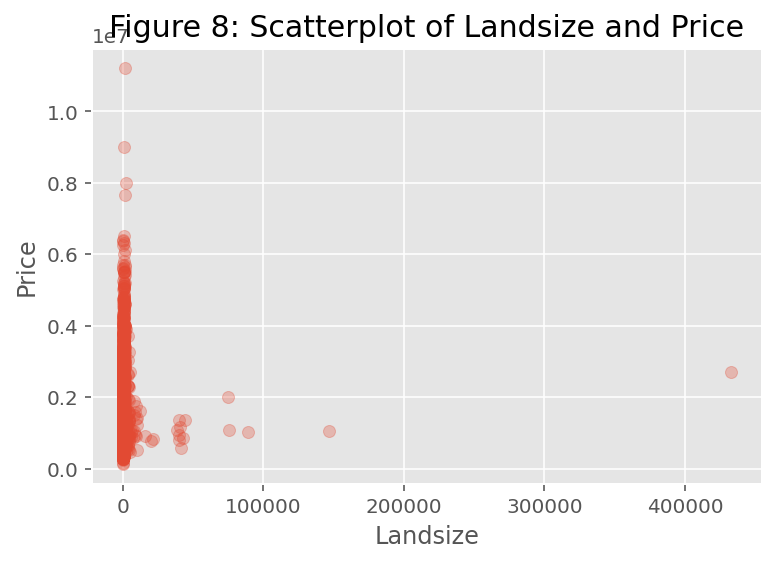

In [20]:
# store the values of Land
land = data['Landsize']

# get a scatter plot
plt.scatter(land, data['Price'], alpha = 0.3)
plt.title('Figure 8: Scatterplot of Landsize and Price', fontsize = 15)
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show();

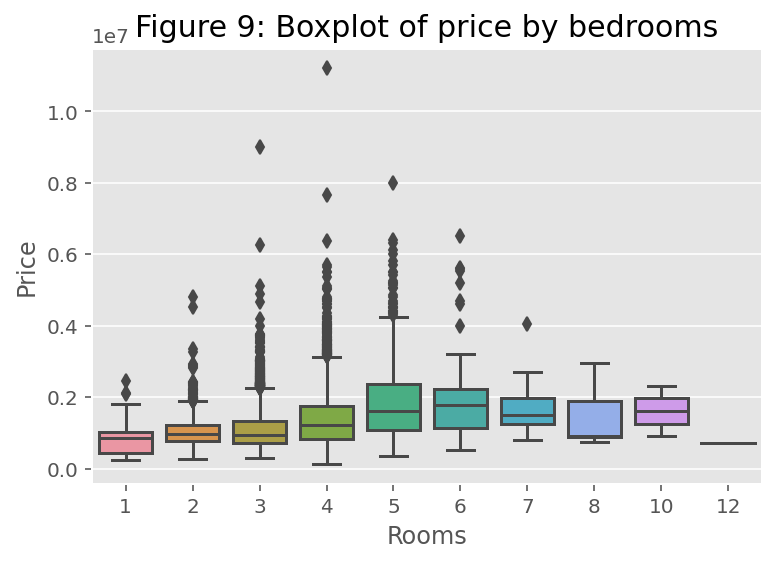

In [21]:
sns.boxplot(data['Rooms'], data['Price']);
plt.title('Figure 9: Boxplot of price by bedrooms', fontsize = 15)
plt.show();

## Statistical Modeling and Performance Evaluation <a name="model"></a>
### Full Model

We begin by fitting a multiple linear regression that predicts **Price** using the feautres **Distance**, **Landsize** and **Bedrooms**

In [22]:
data

,Rooms,Type,Price,Distance,Landsize
1,2,h,1480000.0,2.5,202.0
2,2,h,1035000.0,2.5,156.0
4,3,h,1465000.0,2.5,134.0
5,3,h,850000.0,2.5,94.0
6,4,h,1600000.0,2.5,120.0
...,...,...,...,...,...
34849,3,h,570000.0,25.5,404.0
34851,3,h,1101000.0,6.3,288.0
34852,4,h,1480000.0,6.3,593.0
34853,2,h,888000.0,6.3,98.0


In [23]:
model_full = sm.formula.ols(formula='Price ~ Distance + Landsize + Rooms', data=data)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     1861.
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:34:06   Log-Likelihood:            -1.9995e+05
No. Observations:               13625   AIC:                         3.999e+05
Df Residuals:                   13621   BIC:                         3.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.741e+05   2.05e+04     32.893      0.0

Plotting predicted values and the regression residuals.

In [24]:
residuals_full = pd.DataFrame({'actual': data['Price'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
1,1480000.0,1.208538e+06,271462.432097
2,1035000.0,1.208230e+06,-173230.354130
4,1465000.0,1.528855e+06,-63855.020692
5,850000.0,1.528588e+06,-678587.878281
6,1600000.0,1.849533e+06,-249533.115737
10,941000.0,1.208397e+06,-267397.318137
11,1876000.0,1.529596e+06,346403.659115
14,1636000.0,1.208898e+06,427101.789841
18,1097000.0,1.208658e+06,-111657.781988
24,1350000.0,1.529389e+06,-179389.305516


Actual price vs predicted values.


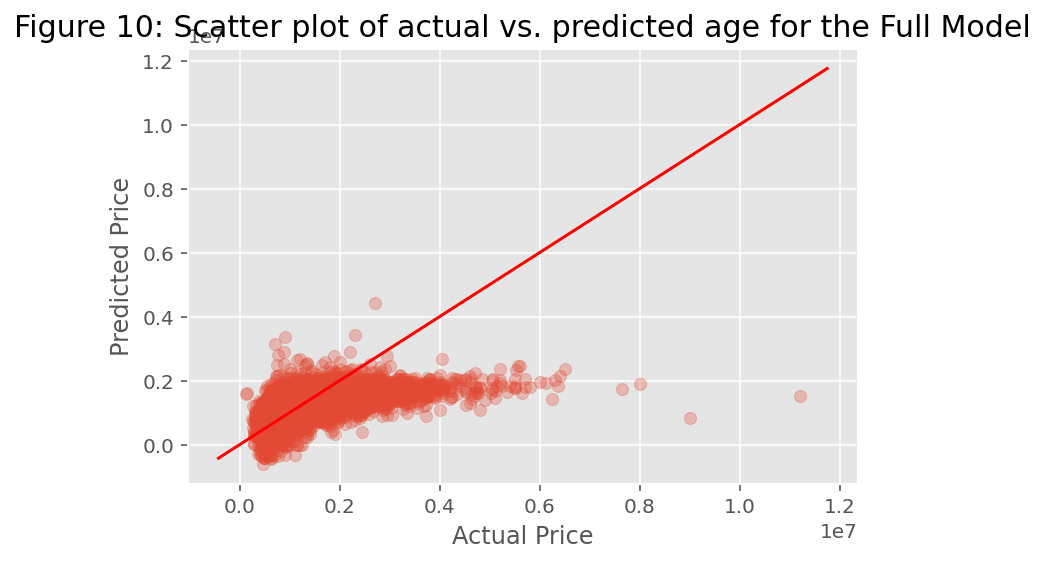

In [25]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 10: Scatter plot of actual vs. predicted price for the Full Model', fontsize=15);
plt.show();

## Revised Model

With relatively weak predictive power, more features where modeled with less data cleaning (e.g. keeping of null values) which significantly improved the Adj. R-squared value to 0.638. 

In [26]:
model_full = sm.formula.ols(formula='Price ~ Distance + Landsize + Rooms + Postcode + Bathroom + YearBuilt + CouncilArea', data=df)
###
model_full_fitted = model_full.fit()
###
print(model_full_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     355.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:34:07   Log-Likelihood:            -1.1091e+05
No. Observations:                7712   AIC:                         2.219e+05
Df Residuals:                    7673   BIC:                         2.222e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [27]:
residuals_full = pd.DataFrame({'actual': df['Price'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,NaN,NaN,NaN
1,1480000.0,NaN,NaN
2,1035000.0,1.191201e+06,-156200.856867
4,1465000.0,1.590339e+06,-125339.002236
5,850000.0,NaN,NaN
6,1600000.0,1.250200e+06,349800.000198
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN
10,941000.0,NaN,NaN


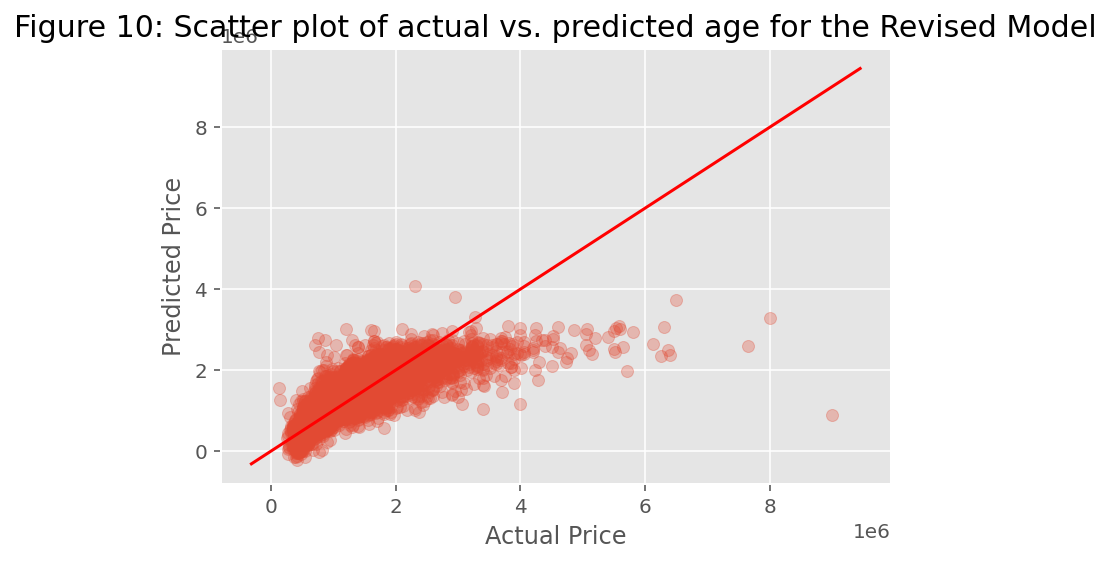

In [28]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 10: Scatter plot of actual vs. predicted price for the Revised Model', fontsize=15);
plt.show();

## Summary and Conclusions <a name="summary"></a>

Originally, this project attempted to predict home prices based on the independent variables of number of rooms, distance to CBD and land size.

This model produced a disappointing Adj. R Squared Value of around 32%.

Opening up the model to more features avaiable in the Melbourne specific data set significantly improved the adjusted model with an Adj. R Squared Value of **64%**.

A significant component of the increase in predictive power is introducing Council Areas, which is only useful for applying this revised model in Melbourne. 



## References

Pino, T. (2018, October). Melbourne Housing Market: Melbourne housign clearance data from Jan 2016, version 27. Retrieved November 1, 2020 from https://www.kaggle.com/anthonypino/melbourne-housing-market